                                 
                                      Cipher Decryption  

<small><image src="https://wallpaperaccess.com/full/1820624.jpg" width=2200 height=400></small>

<small>*What is a cipher?*
* Encode + Decode a message

*Language Modeling*
* What is the probability of this sentence?
* Can generate new sentences (poetry, article spinning)

*Genetic algorithm/evolutionary algorithm*
* Optimization based on biological evolution

*Our decoded message should have the highest likelihood if the model is trained on the English language*
* A message not in English should have a smaller likelihood("maximum likelihood")

</small>

--------------------------------------------------------------------------------------------

<small><p>Build a model that assigns high probability to real words/sentences, low probability to unreal words/sentences</p><small/>

* MYMODEL("I love gaming") -> high probability | decrypt the message correctly<br>
* MYMODEL("U kucw fanlbf") -> low probability | decrypt the message incorrectly<br>

<small>N-grams: A sequence of N tokens 

N = 1: Unigram<br>
N = 2: Bigram<br>
N = 3: Trigram<br>

Markov Models: A Markov model is a model of language that makes the assumption that the next word in a sentence only depends on the previous word (or letter!)<br>
 <small/>

* p(A | B) = p(A, B) / p(B)<br>

* p(A | B) = # of times A appears after B (BA) / # of times B appears (B)<br>


Note: If we have V letters in the alphabet, then we have V^2 bigrams, V^3 trigrams, etc.<br>
- AA, AB, AC, ..., AZ
- BA, BB, BC, ..., BZ
- ....
- ZA, ZB, ZC, ..., ZZ

Therefore, 26 * 26 = 676 bigrams, 26 * 26 * 26 = 17576 trigrams, etc.<br>

“When I consider the short duration of my life, swallowed up in the eternity before and after, the little space which I fill, and even can see, engulfed in the infinite immensity of spaces of which I am ignorant, and which know me not, I am frightened, and am astonished at being here rather than there; for there is no reason why here rather than there, why now rather than then. Who has put me here? By whose order and direction have this place and time been allotted to me? Memoria hospitis unius diei prætereuntis.(The remembrance of a guest of one day that passeth by|Douay-Rheims)”

<b>Packages</b><br>

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import random
import textwrap

<b>Create substitution cipher<b/>

In [129]:
#Create the key and the value for the cipher

letters1 = list(string.ascii_lowercase) #returns a list of all the letters in the alphabet
letters2 = list(string.ascii_lowercase)

letters1

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [130]:
mapping = {}

#Shuffle the values of the letters2 list
random.shuffle(letters2)

#populate the mapping dictionary
for k, v in zip(letters1,letters2):
    mapping[k] = v

In [131]:
letters2

['g',
 'x',
 'k',
 'e',
 's',
 'm',
 'q',
 'v',
 'z',
 'r',
 'o',
 'i',
 'f',
 'w',
 'u',
 'n',
 'd',
 'j',
 'p',
 'h',
 'b',
 'y',
 'a',
 'l',
 'c',
 't']

Time to decrypt the message! We will use a substitution cipher to do this. A substitution cipher is a cipher where each letter in the alphabet is replaced by another letter in the alphabet. For example, we could replace every A with a B, every B with a C, etc. This is a very simple cipher, but it is still difficult to break without knowing the key. We will use a genetic algorithm to find the key.

<b>Language Model (Metamorphosis by Franz Kafka) and log-likelihood function<b/>
<href>https://www.gutenberg.org/ebooks/5200</href> -> path:NLP\data\meta.txt


In [132]:
#Markov Matrix

M = np.ones((26,26)) #26 letters in the alphabet
#add one to each element to avoid zero probabilities
#add one smoothing

#initial state distribution
pi = np.zeros(26)

#update the matrix
def update_transition(starting_letter, ending_letter):
    #ord('a') = 97, ord('b') = 98, ord('c') = 99, etc.
    i = ord(starting_letter) - 97 #ord: returns the unicode code point for a one-character string
    j = ord(ending_letter) - 97
    M[i,j] += 1
    
#Note: Everything stored in the computer is stored as binary code, zeros and ones. (base-2 numeral system)

In [133]:
#update initial state distribution
def update_pi(letter):
    i = ord(letter) - 97
    pi[i] += 1
    
def get_word_probability(word):
    #print("word:", word)
    i = ord(word[0]) - 97
    log_prob = np.log(pi[i])
    
    for letter in word[1:]:
        j = ord(letter) - 97
        log_prob  += np.log(M[i,j])
        i = j #update the index
        
    return log_prob

In [134]:
#probability of a sentence (sequence of words)
def get_sentence_probability(words):
    #if input is a string, convert it to a list of words (array of tokens)
    if type(words) == str:
        words = words.split()
        
    log_prob = 0
    for word in words:
        log_prob += get_word_probability(word)
    return log_prob

In [135]:
with open(r'data/meta.txt', encoding="utf-8") as f:
    meta = f.read()
    

In [136]:
#replace non-alphabetic characters with spaces
regex = re.compile('[^a-zA-Z]')

#split the text into words
words = regex.sub(' ', meta).lower().split()
words[2:7]

#remove empty strings
words = [w for w in words if w != '']

#update the model
for word in words:
    #first letter
    char0 = word[0]
    update_pi(char0)
    
    #rest of the letters
    for char1 in word[1:]:
        update_transition(char0, char1)
        char0 = char1
        
#normalize the probabilities
pi /= pi.sum()
M /= M.sum(axis=1, keepdims=True)

<b>Encoding and Decoding functions<b/>



In [137]:
original_message = '''When I consider the short duration of my life, swallowed up
in the eternity before and after, the little space which I fill, and even can see,
engulfed in the infinite immensity of spaces of which I am ignorant, and which know me not,
I am frightened, and am astonished at being here rather than there; for there is no reason
why here rather than there, why now rather than then. Who has put me here? By whose order 
and direction have this place and time been allotted to me? The remembrance of a guest of 
one day that passeth by'''

In [138]:
original_message

'When I consider the short duration of my life, swallowed up\nin the eternity before and after, the little space which I fill, and even can see,\nengulfed in the infinite immensity of spaces of which I am ignorant, and which know me not,\nI am frightened, and am astonished at being here rather than there; for there is no reason\nwhy here rather than there, why now rather than then. Who has put me here? By whose order \nand direction have this place and time been allotted to me? The remembrance of a guest of \none day that passeth by'

In [139]:
#Encode the message
def encode(message):
    message = message.lower()
    #replace non-alphabetic characters with spaces
    message = regex.sub(' ', message)
    
    #encoded message
    encrpted_message = []
    for char in message:
        encrpted_char = char
        if char in mapping:
            encrpted_char = mapping[char]
        encrpted_message.append(encrpted_char)
        
    return ''.join(encrpted_message)

encoded_message = encode(original_message)

In [140]:
encoded_message

'avsw z kuwpzesj hvs pvujh ebjghzuw um fc izms  pagiiuase bn zw hvs shsjwzhc xsmujs gwe gmhsj  hvs izhhis pngks avzkv z mzii  gwe sysw kgw pss  swqbimse zw hvs zwmzwzhs zffswpzhc um pngksp um avzkv z gf zqwujgwh  gwe avzkv owua fs wuh  z gf mjzqvhswse  gwe gf gphuwzpvse gh xszwq vsjs jghvsj hvgw hvsjs  muj hvsjs zp wu jsgpuw avc vsjs jghvsj hvgw hvsjs  avc wua jghvsj hvgw hvsw  avu vgp nbh fs vsjs  xc avups ujesj  gwe ezjskhzuw vgys hvzp nigks gwe hzfs xssw giiuhhse hu fs  hvs jsfsfxjgwks um g qbsph um  uws egc hvgh ngppshv xc'

In [141]:
def decode(message, mapping):
    #decoded message
    decrypted_message = []
    for char in message:
        decrypted_char = char
        if char in mapping:
            decrypted_char = list(mapping.keys())[list(mapping.values()).index(char)]
        decrypted_message.append(decrypted_char)
        
    return ''.join(decrypted_message)

<b>Genetic Algorithm<b/>

In [142]:
#Evolutionary Algorithm to decode the message

# Initialize 
dna_pool = []
for _ in range(20): #20 DNA strings
    dna = list(string.ascii_lowercase)
    random.shuffle(dna)
    dna_pool.append(dna)

In [143]:
def evolve_offspring(dna_pool, n_children):

    #create n_children per offspring
    offspring = []
    
    for dna in dna_pool:
        for _ in range(n_children):
            copy = dna.copy()
            j = np.random.randint(len(copy))
            k = np.random.randint(len(copy))
            
            #switch
            temp = copy[j]
            copy[j] = copy[k]
            copy[k] = temp
            offspring.append(copy)  
    return offspring + dna_pool         

In [144]:
num_iters = 1000
scores = np.zeros(num_iters)
best_dna = None
best_map = None
best_dna2score = float('-inf') #minus infinity, minimum possible value
for i in range(num_iters):
    if i > 0:
        #get offspring from the current dna pool
        dna_pool = evolve_offspring(dna_pool, n_children=3)
        
    #calculate the dna2score for each dna string
    dna2score = {}
    for dna in dna_pool:
        #populate the mapping dictionary
        current_map = {}
        for k, v in zip (letters1, dna):
            current_map[k] = v
            
        #decode the message
        decoded_message = decode(encoded_message, current_map)
        score = get_sentence_probability(decoded_message)
        
        dna2score[''.join(dna)] = score #list to string to use it in the dictionary
        
        #keep track of the best dna string
        
        if score > best_dna2score:
            best_dna = dna
            best_map = current_map
            best_dna2score = score
        
        
    #average dna2score for this iteration
    scores[i] = np.mean(list(dna2score.values()))
    
    #keep the best 5 dna strings
    #turn into a list
    sorted_dna2score = sorted(dna2score.items(), key=lambda x: x[1], reverse=True) #sort allows us to sort the dictionary by the values
    dna_pool = [list(k) for k, v in sorted_dna2score[:5]]
    
    if i % 100 == 0:
        print("iter:", i, "dna2score:", scores[i], "best dna2score so far:", best_dna2score)
    
        
    

C:\Users\basak\AppData\Local\Temp\ipykernel_688\1122369175.py:9: RuntimeWarning: divide by zero encountered in log
  log_prob = np.log(pi[i])


iter: 0 dna2score: -inf best dna2score so far: -1885.4892018096032
iter: 100 dna2score: -inf best dna2score so far: -1247.1390424156261
iter: 200 dna2score: -inf best dna2score so far: -1164.4394214151
iter: 300 dna2score: -inf best dna2score so far: -1026.7290279731951
iter: 400 dna2score: -inf best dna2score so far: -998.0539899664259
iter: 500 dna2score: -inf best dna2score so far: -979.1312194832418
iter: 600 dna2score: -inf best dna2score so far: -963.0919684308092
iter: 700 dna2score: -inf best dna2score so far: -963.0919684308092
iter: 800 dna2score: -inf best dna2score so far: -963.0919684308092
iter: 900 dna2score: -inf best dna2score so far: -963.0919684308092


In [145]:
#Use the best mapping to decode the message
decoded_message = decode(encoded_message, best_map)


print("log likelihood of original message:", get_sentence_probability(decoded_message))
print("log likelihood of decoded message:", get_sentence_probability(regex.sub(' ', original_message.lower())))

log likelihood of original message: -963.0919684308092
log likelihood of decoded message: -963.0919684308092


In [147]:
#Which letters are wrong?

for true, v in mapping.items():
    guess = best_map[true]
    if guess != true:
        print(true, '->', guess, '\t', 'CORRECT!' if guess == v else 'WRONG!')

a -> g 	 CORRECT!
b -> x 	 CORRECT!
c -> k 	 CORRECT!
d -> e 	 CORRECT!
e -> s 	 CORRECT!
f -> m 	 CORRECT!
g -> q 	 CORRECT!
h -> v 	 CORRECT!
i -> z 	 CORRECT!
j -> d 	 WRONG!
k -> o 	 CORRECT!
l -> i 	 CORRECT!
m -> f 	 CORRECT!
n -> w 	 CORRECT!
o -> u 	 CORRECT!
p -> n 	 CORRECT!
q -> t 	 WRONG!
r -> j 	 CORRECT!
s -> p 	 CORRECT!
t -> h 	 CORRECT!
u -> b 	 CORRECT!
v -> y 	 CORRECT!
w -> a 	 CORRECT!
x -> l 	 CORRECT!
y -> c 	 CORRECT!
z -> r 	 WRONG!


In [150]:
#Print the decoded message
print("Decoded message:\n", textwrap.fill(decoded_message))

print("\nTrue message:\n", textwrap.fill(original_message))

Decoded message:
 when i consider the short duration of my life  swallowed up in the
eternity before and after  the little space which i fill  and even can
see  engulfed in the infinite immensity of spaces of which i am
ignorant  and which know me not  i am frightened  and am astonished at
being here rather than there  for there is no reason why here rather
than there  why now rather than then  who has put me here  by whose
order  and direction have this place and time been allotted to me  the
remembrance of a guest of  one day that passeth by

True message:
 When I consider the short duration of my life, swallowed up in the
eternity before and after, the little space which I fill, and even can
see, engulfed in the infinite immensity of spaces of which I am
ignorant, and which know me not, I am frightened, and am astonished at
being here rather than there; for there is no reason why here rather
than there, why now rather than then. Who has put me here? By whose
order  and direction hav

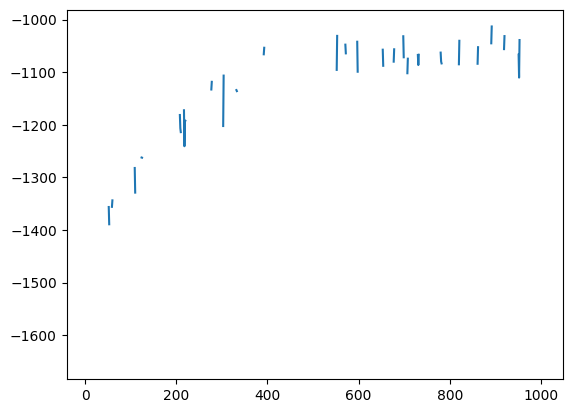

In [154]:
plt.plot(scores)
plt.show()